In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [10]:
def generate_cluster_masks(file_path):

    dam_locations_df = pd.read_csv(file_path)

    # Convert lat/lon to radians for use in Haversine formula
    coords = dam_locations_df[['Latitude', 'Longitude']].to_numpy()
    coords_rad = np.radians(coords)

    # Earth's radius in kilometers
    earth_radius_km = 6371.0088

    # DBSCAN
    db = DBSCAN(eps=0.5 / earth_radius_km, min_samples=5, algorithm='ball_tree', metric='haversine').fit(coords_rad)
    dam_locations_df['Cluster'] = db.labels_

    # storing rectangles
    bounding_rectangles = []
    for cluster_label in set(db.labels_):
        cluster_points = dam_locations_df[dam_locations_df['Cluster'] == cluster_label]
        min_lat, max_lat = cluster_points['Latitude'].min(), cluster_points['Latitude'].max()
        min_lon, max_lon = cluster_points['Longitude'].min(), cluster_points['Longitude'].max()

        # Store the bounding rectangle
        bounding_rectangle = {'Cluster': cluster_label,
                              'Lower Left': (min_lon, min_lat),
                              'Upper Right': (max_lon, max_lat)}
        bounding_rectangles.append(bounding_rectangle)

    return bounding_rectangles, dam_locations_df


In [11]:
import matplotlib.pyplot as plt

def plot_dam_locations_and_masks(dam_locations_df, masks):
    # Plot original dam coordinates
    plt.figure(figsize=(10, 8))
    plt.scatter(dam_locations_df['Longitude'], dam_locations_df['Latitude'], c=dam_locations_df['Cluster'], cmap='viridis', label='Dam Locations', s=10)

    # Plot masks (bounding rectangles)
    for mask in masks:
        rect = plt.Rectangle((mask['Lower Left'][0], mask['Lower Left'][1]),
                             mask['Upper Right'][0] - mask['Lower Left'][0],
                             mask['Upper Right'][1] - mask['Lower Left'][1],
                             fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)

    plt.title('Beaver Dam Locations and Cluster Masks')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()


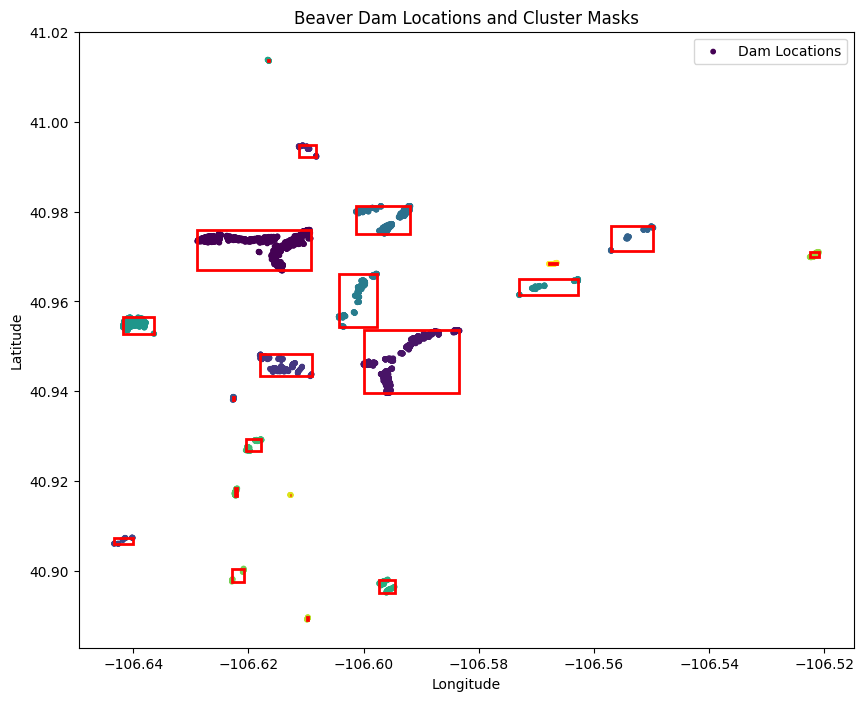

In [12]:
file_path = 'dam_location.csv'
masks, dam_locations_df = generate_cluster_masks(file_path)

plot_dam_locations_and_masks(dam_locations_df, masks)

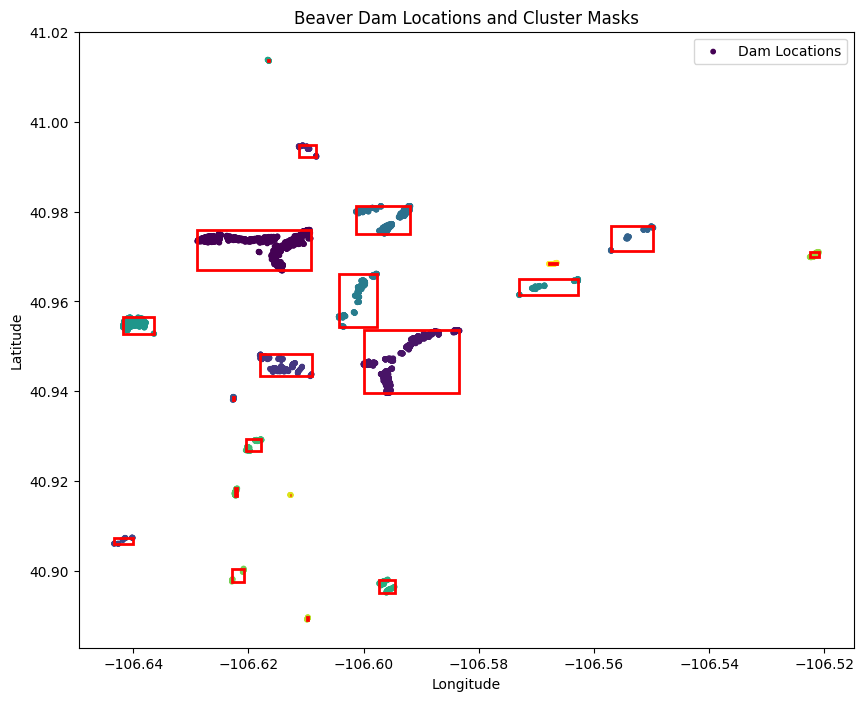

In [13]:
file_path = 'negative_location.csv'
masks_negative, dam_locations_df_negative = generate_cluster_masks(file_path)

plot_dam_locations_and_masks(dam_locations_df, masks)